In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("KNN_Project_Data.csv")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742175,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [4]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_featuers=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [19]:
df_feat=pd.DataFrame(scaled_featuers,columns=df.columns[:-1])

In [20]:
from sklearn.cross_validation import train_test_split
X=df_feat
y=df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
predictions=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report =\n",classification_report(y_test,predictions))
print("Confusion report =\n",confusion_matrix(y_test,predictions))
print("Accuracy score =\n",accuracy_score(y_test,predictions))

Classification report =
              precision    recall  f1-score   support

          0       0.76      0.76      0.76        98
          1       0.76      0.76      0.76       102

avg / total       0.76      0.76      0.76       200

Confusion report =
 [[74 24]
 [24 78]]
Accuracy score =
 0.76


In [24]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions=knn.predict(X_test)
    from sklearn.metrics import classification_report,confusion_matrix
    error_rate.append(np.mean(predictions != y_test))

Text(0,0.5,'Error Rate')

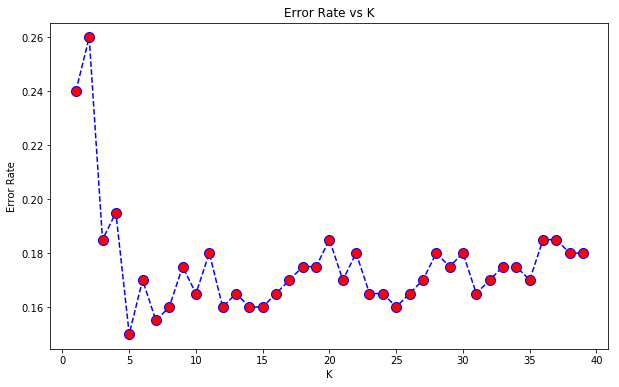

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report =\n",classification_report(y_test,predictions))
print("Confusion report =\n",confusion_matrix(y_test,predictions))
print("Accuracy score =\n",accuracy_score(y_test,predictions))

Classification report =
              precision    recall  f1-score   support

          0       0.85      0.85      0.85        98
          1       0.85      0.85      0.85       102

avg / total       0.85      0.85      0.85       200

Confusion report =
 [[83 15]
 [15 87]]
Accuracy score =
 0.85
